# Personalized Healthcare Recommendations Machine Learning Project

## Project Overview

The Personalized Healthcare Recommendations project aims to develop a machine learning model that
provides tailored healthcare recommendations based on individual patient data. This can include
recommendations for lifestyle changes, preventive measures, medications, or treatment plans. The goal is to
improve patient outcomes by leveraging data-driven insights to offer personalized advice.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# Loading Dataset

In [ ]:
data = pd.read_csv("blood.csv")

In [ ]:
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Initial Exploration

In [ ]:
# Getting the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
# Performing basic EDA to get overview of data
data.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


# Data Cleaning

In [ ]:
# checking duplicates
data.duplicated().sum()

215

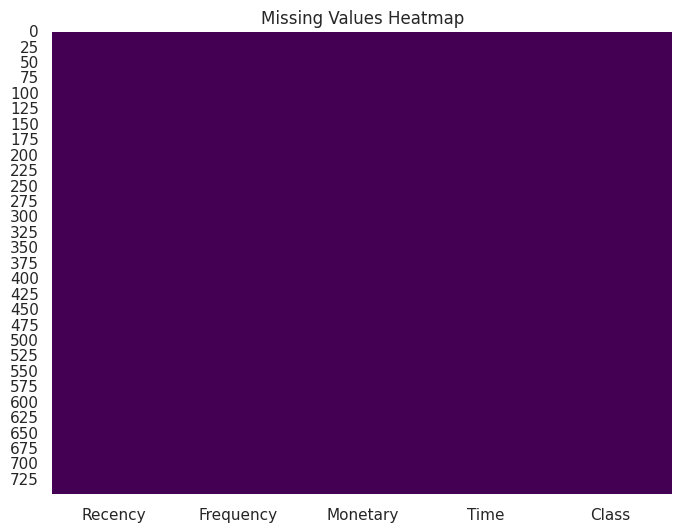

In [ ]:
# checking missing values
data.isnull().sum()
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Dropping the duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Rechecking for duplicated values
data.duplicated().sum()

0

In [ ]:
## Since we had no missing values we are done with the data cleaning ( BLANK HEATMAP )

# Data Exploration Part_02 | Histograms for each feature

Text(0.5, 0.98, 'Feature Distributions')

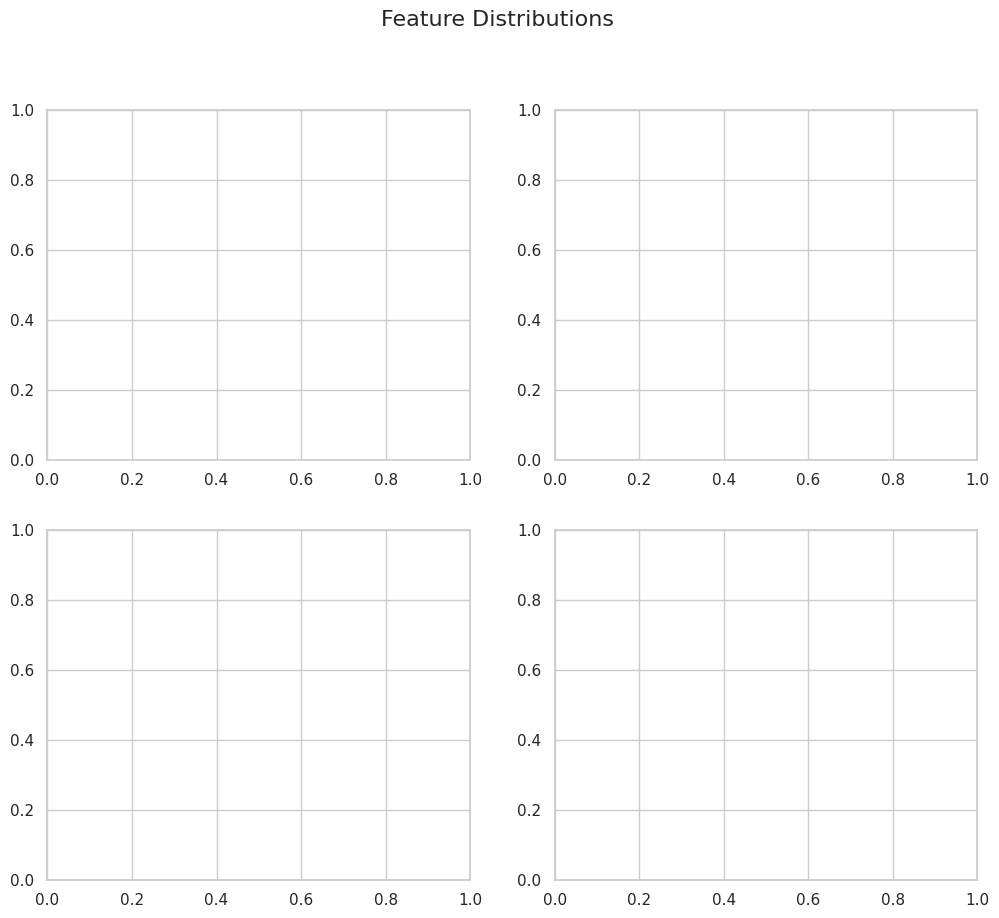

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Feature Distributions', fontsize=16)

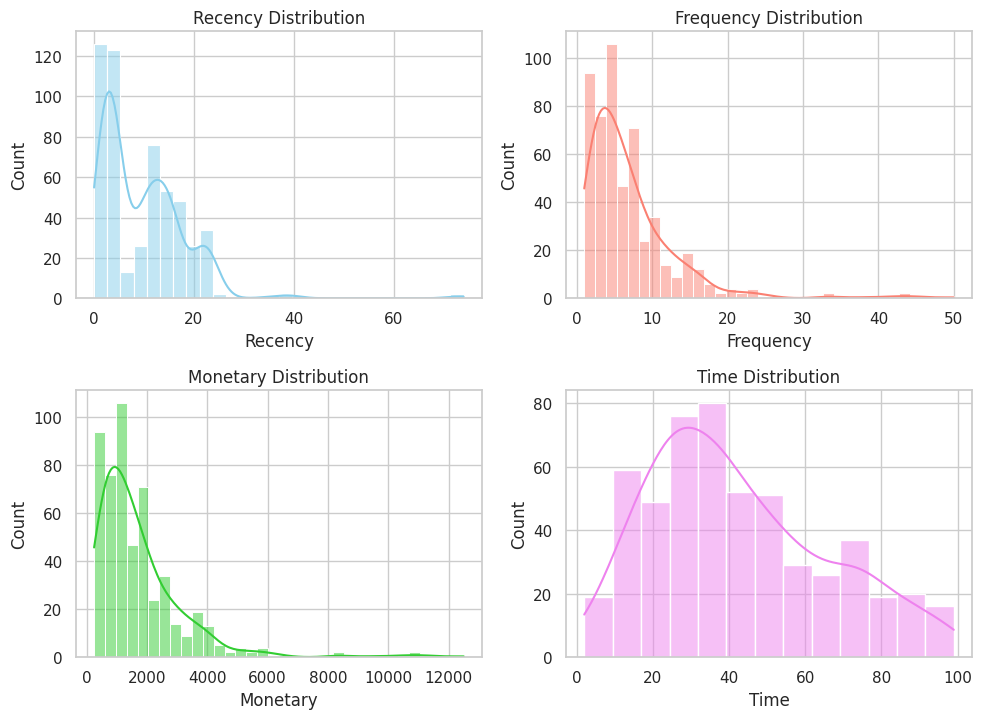

In [ ]:
# Define a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot Recency distribution
sns.histplot(data['Recency'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Recency Distribution')

# Plot Frequency distribution
sns.histplot(data['Frequency'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Frequency Distribution')

# Plot Monetary distribution
sns.histplot(data['Monetary'], kde=True, ax=axes[1, 0], color='limegreen')
axes[1, 0].set_title('Monetary Distribution')

# Plot Time distribution
sns.histplot(data['Time'], kde=True, ax=axes[1, 1], color='violet')
axes[1, 1].set_title('Time Distribution')

# Adjust layout
plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()

# Finding the Correlation Matrix

In [ ]:
correlation_matrix = data.corr()

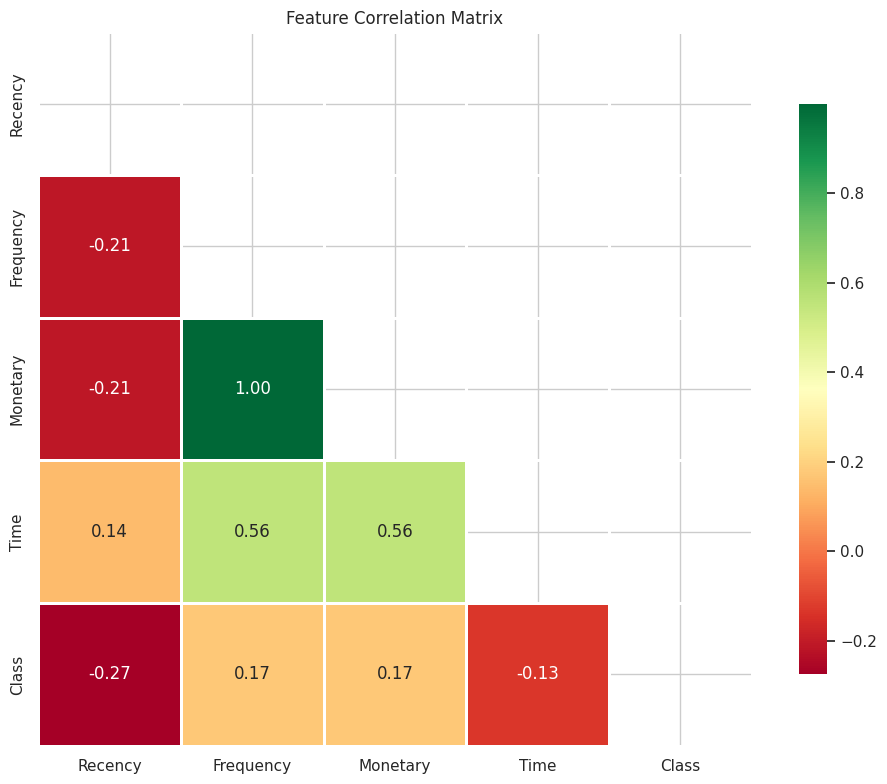

In [ ]:

correlation_matrix = data.corr()

# correlation matrix visualization
plt.figure(figsize=(10, 8))

# Applying a mask to only show the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting with a diverging color palette and a mask for the upper triangle
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlGn',
    fmt=".2f",
    mask=mask,  # For upper triangle
    square=True,
    cbar_kws={"shrink": .8},  # bar size
    linewidths=1 # Add lines between cells for better visuals
)

plt.title("Feature Correlation Matrix")
plt.tight_layout()

plt.savefig("correlation_matrix.png", dpi=300)

plt.show()


# Feature Engineering

In [ ]:
# Splitting the data into training and testing sets with the variables x and y

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((426, 4), (107, 4))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=X.columns).head()


,Recency,Frequency,Monetary,Time
0,0.811826,-0.499038,-0.499038,-0.104606
1,-0.963002,0.512494,0.512494,0.414061
2,-0.709455,0.681082,0.681082,2.272616
3,0.811826,-0.499038,-0.499038,0.111505
4,0.177959,0.343905,0.343905,-0.407161


# Checking Model's Accuracy

## IDEA

First we will select all the best models that are best suited for this project. After selection we will apply those models one by one on our training set and test set.

Then we will calculate the accuracy scores for each model. The model that gives best accuracy, we will be training that model.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_accuracies = {}

In [ ]:
#1 Logistic Regression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
model_accuracies['Logistic Regression'] = log_reg_accuracy

In [ ]:
#2 Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = rf_accuracy

In [ ]:
# 3. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
model_accuracies['XGBoost'] = xgb_accuracy

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:48:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 4. Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
model_accuracies['Support Vector Machine'] = svm_accuracy

In [ ]:
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

Logistic Regression: 0.7664
Random Forest: 0.6262
XGBoost: 0.7103
Support Vector Machine: 0.7570


In [ ]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"\nThe best model is: {best_model_name} with accuracy: {model_accuracies[best_model_name]:.4f}")


The best model is: Logistic Regression with accuracy: 0.7664


# Model Training


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and their ranges for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Regularization types, note 'l1' requires 'liblinear' solver
    'solver': ['liblinear', 'saga']  # solvers supporting l1 and l2 regularization
}

log_reg = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7441


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Model Tuning

Final Test Accuracy: 0.7664
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        80
           1       0.58      0.26      0.36        27

    accuracy                           0.77       107
   macro avg       0.69      0.60      0.61       107
weighted avg       0.74      0.77      0.73       107

ROC-AUC Score: 0.7826
Confusion Matrix:
 [[75  5]
 [20  7]]


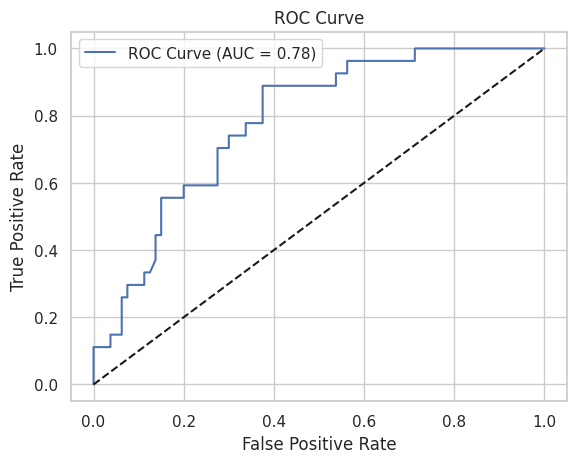

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

final_log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)
final_log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred_final = final_log_reg.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_final))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, final_log_reg.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, final_log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Feature Importance using correlations

In [ ]:
coefficients = final_log_reg.coef_[0]
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

print("Feature Importances (Coefficients):\n", feature_importance)


Feature Importances (Coefficients):
      Feature  Coefficient
2   Monetary     0.000437
1  Frequency     0.000000
3       Time    -0.025554
0    Recency    -0.081558


# Saving the Model

In [ ]:
import pickle

with open("final_logistic_regression_model.pkl", "wb") as file:
    pickle.dump(final_log_reg, file)

print("Model saved successfully as 'final_logistic_regression_model.pkl'")


Model saved successfully as 'final_logistic_regression_model.pkl'
